In [159]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

cmi = {}
mean_corr = {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}

periodic = False
model = "1DTFIM"
if model == "1DXXZ":
    int_ = "delta"
    param = [1.2, 1.05, 1.01, 1.0, 0.99, 0.8, -0.8, -0.99, -1.0, -1.01, -1.05, -1.2]
elif model == "1DJ1J2":
    int_ = "J2"
    param = [0.2, 0.4, 0.48, 0.52, 0.6, 0.7, 0.9, 1.0, 1.05, 1.15]
elif model == "1DTFIM":
    int_ = "B"
    param =  [-0.5, -0.8, -0.95,-0.98, -1.0, -1.02, -1.05, -1.2, -1.5, -2.0, -3.5, -6.0]

L = 22
# Looping through the values and loading each file

for b in param:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    cmi[b] = np.load(filename)
    cmi[b] = cmi[b][cmi[b]>1e-13]
    if periodic == True:
        cmi[b] = np.flip(cmi[b])
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    mean_corr[b] = np.load(filename)

    if periodic == False:
        filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
        var_corr[b] = np.load(filename)
        var_corr[b] = var_corr[b][mean_corr[b]>1e-13]
    mean_corr[b] = mean_corr[b][mean_corr[b]>1e-13]
    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    gap[b] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    cmi_traceout[b] = np.load(filename, allow_pickle=True)
    for j in range(len(cmi_traceout[b])):
        cmi_traceout[b][j] = np.array(cmi_traceout[b][j])[np.array(cmi_traceout[b][j])>1e-13]
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    mag[b] = np.load(filename)



In [160]:

cmi_length = []
err_cmi_length = []
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range(len(param))]
err_cmi_length_traceout = [[] for i in range(len(param))]

for i in param:
    if len(cmi[i])>=3:
        df = len(cmi[i]) - 2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x) ** 2))
        cmi_length.append(1/cmi_len)
        err_cmi_length.append(1/cmi_len**2*err)
    if len(mean_corr[i])>=3:
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(mean_corr[i]), 1,
                                                        full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x) ** 2))
        corre_length.append(1/corr_len)
        err_corre_length.append(1/corr_len**2*err)

    for j in range(len(cmi_traceout[i])):
        if len(cmi_traceout[i][j])>=3:
            df = len(cmi_traceout[i][j]) - 2
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])),
                                                           -np.log(cmi_traceout[i][j] + 1e-32), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x) ** 2))
            cmi_length_traceout[param.index(i)].append(1/cmi_len)
            err_cmi_length_traceout[param.index(i)].append(1/cmi_len**2*err)



In [144]:
cmi_length

[1.0628596493510056,
 1.7876342131367688,
 1.844369903794963,
 1.7787544591842248,
 1.7262769062941685,
 1.6697956581189126,
 1.5822112329714029,
 1.203677408795272,
 0.8085896432399605,
 0.5009947658790507,
 0.29049979203944976,
 0.21017730514035296]

In [161]:
corre_length

[-587.2493961727531,
 48.20282453324074,
 13.463363213224753,
 10.721094597862004,
 9.336284685402955,
 8.22105489830096,
 6.928294513458722,
 3.8196391057071657,
 2.103167588772851,
 1.3176852395405025,
 0.760097461691,
 0.5336584481087349]

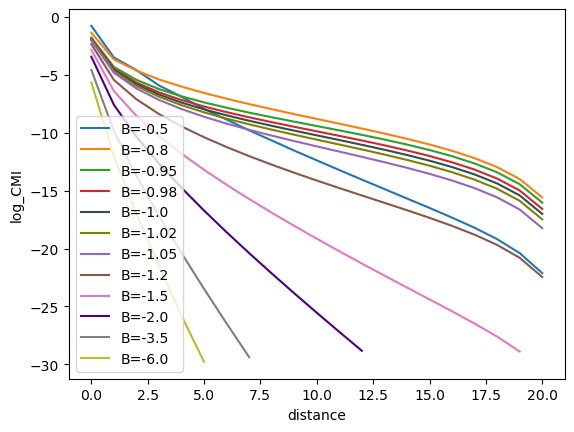

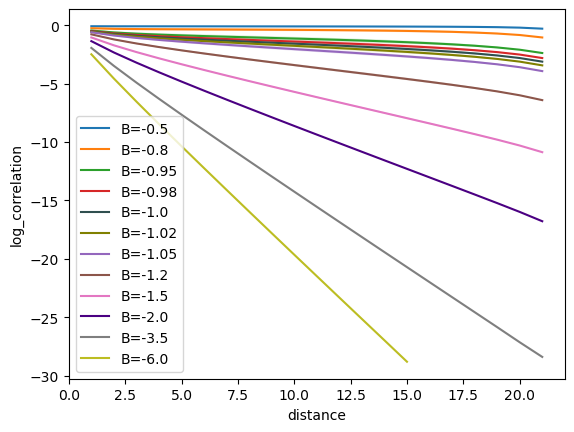

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


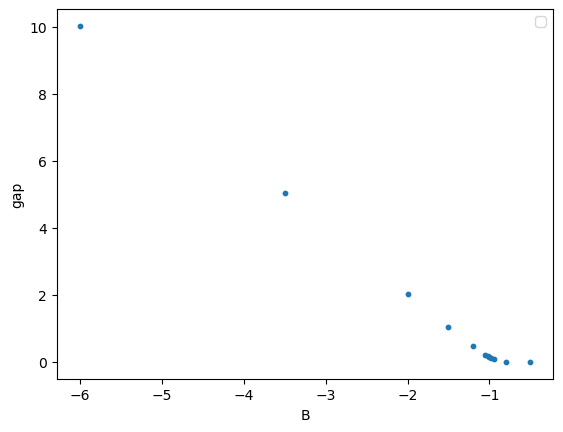

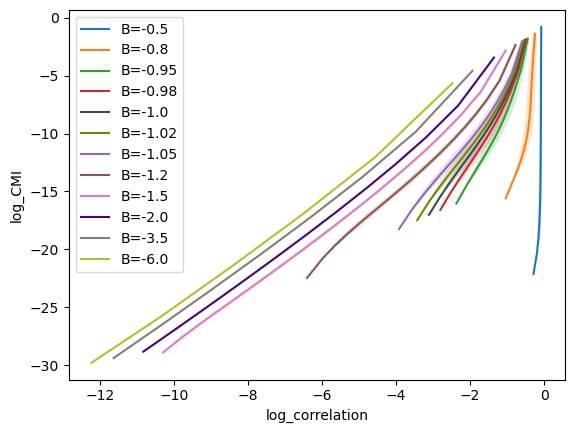

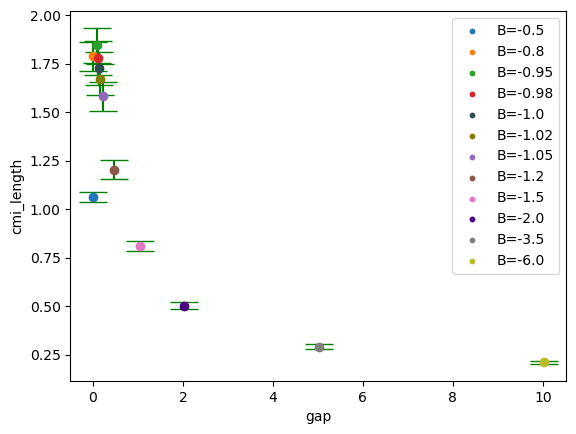

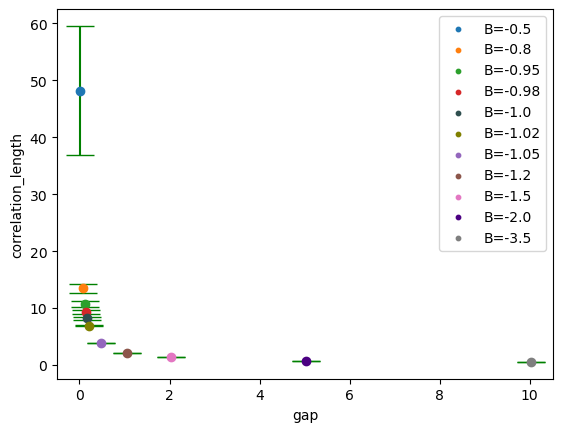

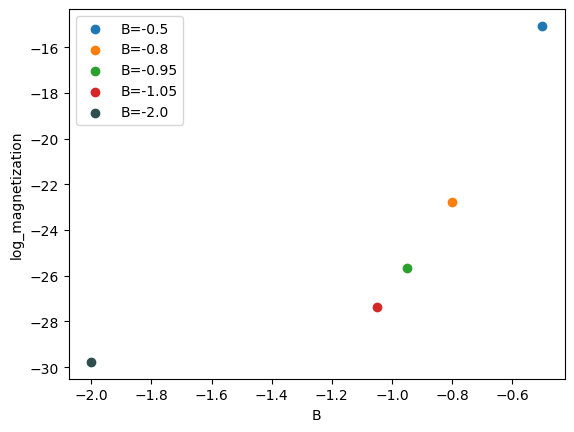

In [149]:

for i in param:
    if len(cmi[i])>=3: #so that meaningful error can be got
        plt.plot(np.log(cmi[i]), label= int_ +"=" + str(i))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L" + str(L) + "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    if len(mean_corr[i])>=3: #so that meaningful error can be got
        plt.plot(np.arange(len(mean_corr[i]) - 1) + 1, np.log(mean_corr[i][1:]), label= int_ + "=" + str(i))
        if periodic == False:
            plt.fill_between(np.arange(len(mean_corr[i]) - 1) + 1,
                             np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
                             np.log(mean_corr[i][1:]) + 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig(
    "figure/"+model+"/correlation_"+model+"_L" + str(L) + "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()


B_ = [param[i] for i in range(len(param))]
plt.scatter(B_, gap.values(), s=10)
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    length = min(len(cmi[i]), len(mean_corr[i]))
    plt.plot(np.log(mean_corr[i][1:length+1]), np.log(cmi[i][:length]), label= int_ + "=" + str(i))
    if periodic == False:
        plt.fill_betweenx(np.log(cmi[i][:length]),
                          np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
                          np.log(mean_corr[i][1:length+1]) + 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig(
    "figure/"+model+"/correlation_cmi_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in param:
    if len(cmi[i])>=3:
        gap_list.append(gap[i])
for i,j in zip(param, range(len(gap_list))):
    plt.scatter(gap_list[j], cmi_length[j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], cmi_length[j], yerr=err_cmi_length[j][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig(
    "figure/"+model+"/cmi_length_gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in param:
    if len(mean_corr[i])>=3 and corre_length[param.index(i)]>0:
        gap_list.append(gap[i])
for i,j in zip(param, range(len(gap_list))):
    plt.scatter(gap_list[j], np.array(corre_length)[np.array(corre_length)>0][j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], np.array(corre_length)[np.array(corre_length)>0][j], yerr=np.array(err_corre_length)[np.array(corre_length)>0, 0][j], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L" + str(L) +  "_"+ "periodic_" + str(
    periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    mag[i] = np.abs(mag[i])
    if mag[i]>1e-13:
        plt.scatter(i, np.log(mag[i]), label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("log_magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

In [136]:
corre_length

[-223.2746880930379,
 30.01033546844992,
 9.687025270306984,
 8.109593389550339,
 7.276960639921427,
 6.580475785280313,
 5.735161543269285,
 3.4607318583485034,
 2.0034893978566233,
 1.2812159118998248,
 0.7483731534990481,
 0.53357718751748]

0
[1.0628596493510056, 1.0665031406786218, 1.0633628395538806, 1.053477862425417, 1.0383518765283917, 1.0204252324183538, 0.9999689064341761, 0.977620166769287, 0.9526404711690314, 0.9251331090829513, 0.8945849669315135, 0.8602493763374192, 0.822388984365281, 0.7786014745119147, 0.7310336188540509, 0.6732155181942414, 0.6132196185236239]


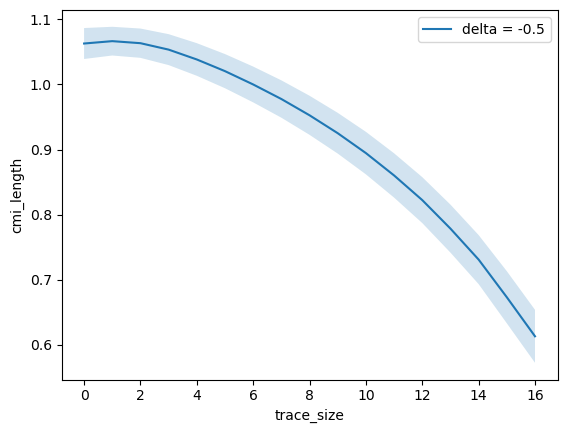

1
[1.7876342131367688, 1.7958596488358756, 1.7738181272636055, 1.7351402129769502, 1.6852776713267423, 1.6271530967107257, 1.5626716961927234, 1.493120112596797, 1.4193028302727706, 1.3416699067015885, 1.2604258046217682, 1.1756361184533666, 1.087267038330781, 0.9952036575237986, 0.8993302127837779, 0.7992005636810804, 0.694837105748214]


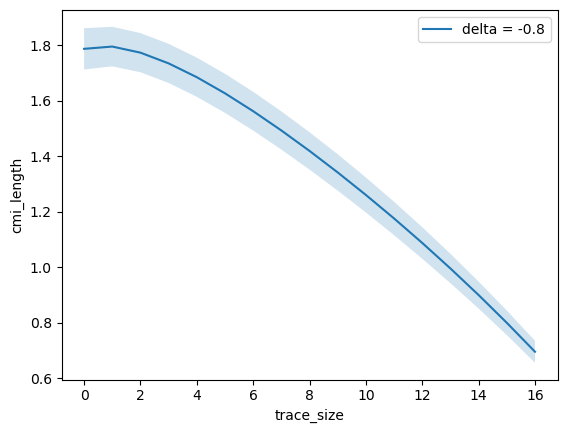

2
[1.844369903794963, 1.8592179778976037, 1.8364940011224569, 1.7925568743855527, 1.7346958909429384, 1.6669740949828706, 1.5919356392049366, 1.5112874306471726, 1.4262246782992576, 1.3376060399023062, 1.2460560157908052, 1.1520281019037977, 1.0558445063124875, 0.9577195965547605, 0.8577706236486184, 0.7560091926780126, 0.6523213171487573]


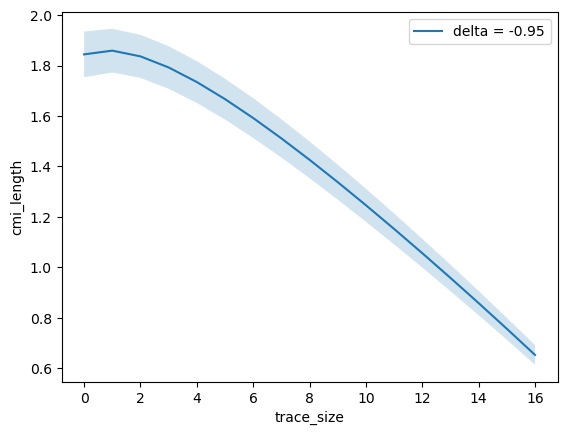

3
[1.7787544591842248, 1.794069087017397, 1.77320676394831, 1.7317699365486572, 1.6767664647538607, 1.612122845756136, 1.5403063206616505, 1.4629775164473193, 1.381304071661575, 1.2961297188693364, 1.208072751610822, 1.1175860986216546, 1.0249942931763554, 0.9305145428228453, 0.8342646046433555, 0.7362540820475418, 0.6363552227836945]


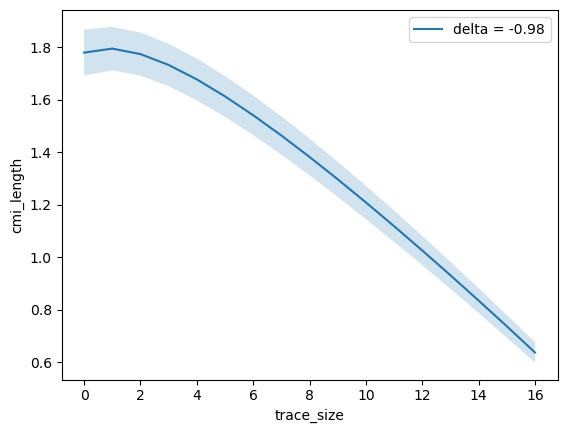

4
[1.7262769062941685, 1.7415144346625195, 1.721934575508999, 1.6824674325876146, 1.6298471317715653, 1.567857148067165, 1.4988783326775652, 1.4245137693113517, 1.3458899036615575, 1.2638191900531845, 1.1788948372275752, 1.091548492873491, 1.0020855187157784, 0.9107047940484124, 0.8175054752066988, 0.7224780305004052, 0.6254727921823272]


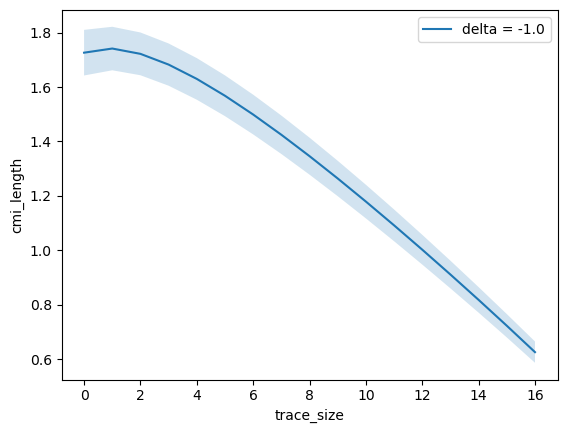

5
[1.6697956581189126, 1.6846654100590555, 1.6663052860923524, 1.6288998056220747, 1.5788677392122017, 1.5198214442920845, 1.4540338381747446, 1.3830321128778382, 1.307884692850274, 1.229356685818513, 1.148000674023291, 1.0642120916759568, 0.9782630829213044, 0.8903214164056042, 0.8004566556299844, 0.7086311983424439, 0.6146681610130362]


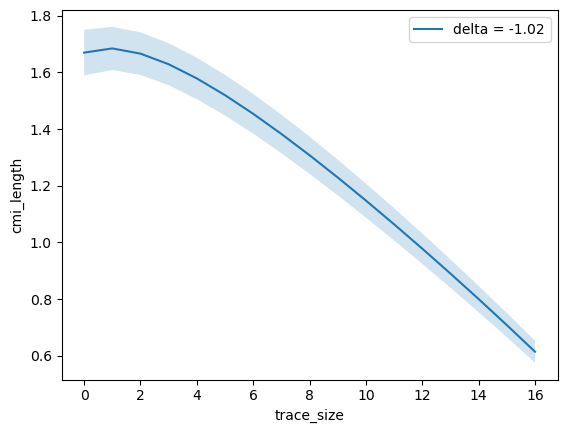

6
[1.5822112329714029, 1.596095292337792, 1.579353290664014, 1.54501015254878, 1.4989785542088279, 1.444585353283256, 1.3839145315965535, 1.3183532005017118, 1.2488571589058806, 1.176095871228976, 1.1005378589964627, 1.0225032111336176, 0.9421958965091365, 0.8597218564883282, 0.7750947747639388, 0.688227290254376, 0.5988989901324885]


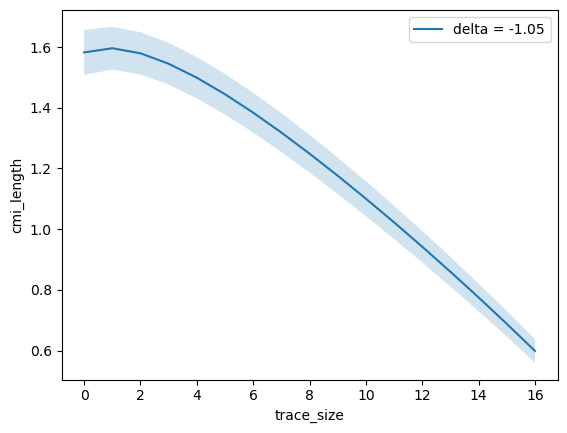

7
[1.203677408795272, 1.210567219818434, 1.1983965462585355, 1.1756146564931678, 1.1460024780732494, 1.1115609514117224, 1.073403539421372, 1.0321433965670221, 0.9880932509715405, 0.9413781807911585, 0.8920018039349761, 0.8398848787314047, 0.7848864816518244, 0.7268129357419515, 0.6654163710947941, 0.6003812842435804, 0.5312914121077287]


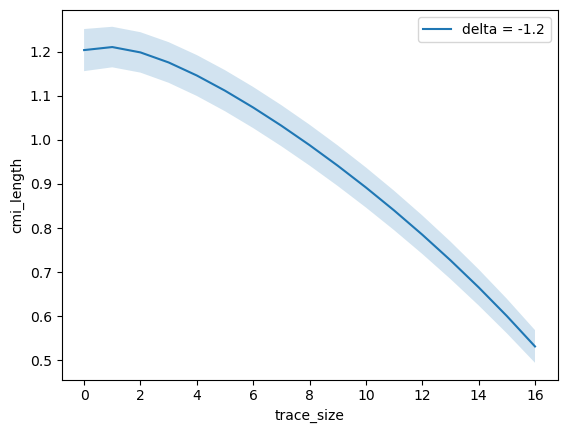

8
[0.8085896432399605, 0.8095434042877437, 0.8012230614323443, 0.7888755239831571, 0.7741000651599526, 0.7577139539532406, 0.739827115756311, 0.7204330776193378, 0.6994085407493636, 0.676574576697718, 0.6517054956349705, 0.6245295588321854, 0.5947226175806021, 0.5618971650954472, 0.5255859686559748, 0.48521790481228827, 0.4400792200954628]


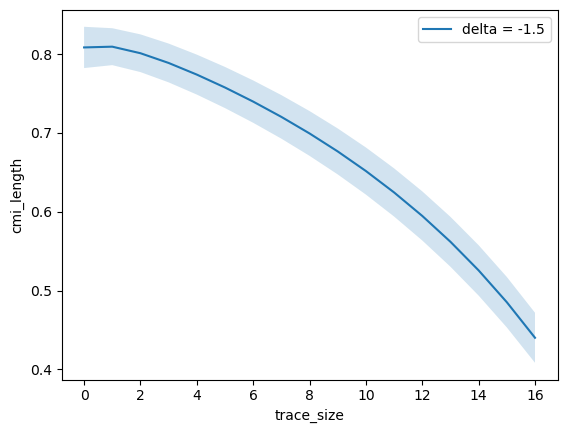

9
[0.5009947658790507, 0.5064375727363543, 0.5074570000546185, 0.507900908292807, 0.5078127993531049, 0.5077731627955694, 0.5073977947073331, 0.5060462108142699, 0.5007355107004756, 0.4893091207811783, 0.47658275905743375, 0.4623556652856652, 0.4463454532334553, 0.4281956435364076, 0.40744740717300876, 0.38350117788141613, 0.3555568591599476]


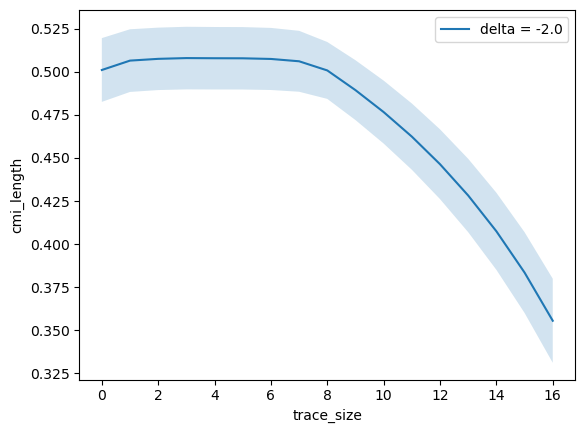

10
[0.29049979203944976, 0.2913610888635391, 0.2914860881238286, 0.291449336056754, 0.2915843106316519, 0.29151841751361446, 0.29148446930448885, 0.29151453124876153, 0.29151584631256755, 0.29151841712558596, 0.2914518089762171, 0.29145055116495006, 0.29141370540237954, 0.29016332750697105, 0.2807634956713982, 0.2695137735584985, 0.2558328655876906]


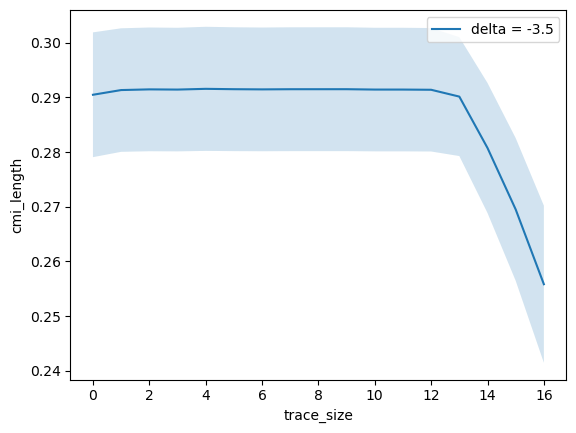

11
[0.21017730514035296, 0.20978928290395427, 0.20115210745184886, 0.20114815972306155, 0.20952592105300274, 0.20938821217543838, 0.20933406058094364, 0.20115265602287144, 0.20930617106047428, 0.20936288306937054, 0.20949828857037225, 0.2011549074249369, 0.20952566713030374, 0.20115377797827608, 0.20115264839031702, 0.2011379851657132, 0.20075998957795593]


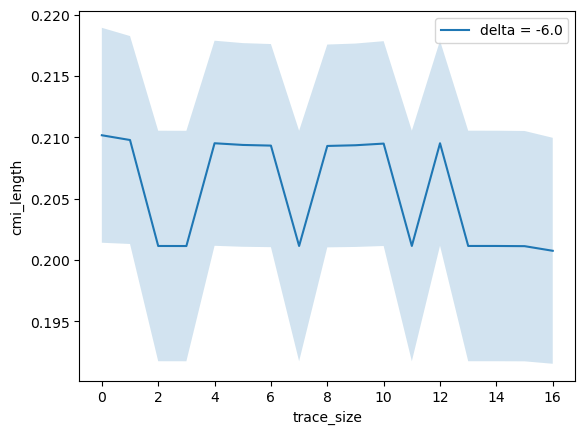

<Figure size 640x480 with 0 Axes>

In [147]:
for i in range(len(param)):
    print(i)
    print(cmi_length_traceout[i])
    if len(cmi_length_traceout[i])>=3:
        cmi_length_traceout[i] = np.array(cmi_length_traceout[i])
        err_cmi_length_traceout[i] = np.array(err_cmi_length_traceout[i]).ravel()
        plt.plot(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(param[i]))
        plt.fill_between(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i] - err_cmi_length_traceout[i],
                         cmi_length_traceout[i] + err_cmi_length_traceout[i], alpha=0.2)
        plt.xlabel("trace_size")
        plt.ylabel("cmi_length")
        plt.legend()
        plt.savefig(
            "figure/"+model+"/traceout/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(param[i]) + "periodic_" + str(
                periodic) + ".png")
        plt.show()
        plt.clf()

In [158]:
np.concatenate((np.array([[1,2,3]]), np.array([[2,1,3]])), axis = 0)

array([[1, 2, 3],
       [2, 1, 3]])